In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import scipy
from scipy import stats
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline


%load_ext autoreload
%autoreload 2

# import gzip
# from cyvcf2 import VCF

from sklearn.linear_model import LinearRegression

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()



In [2]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)



In [3]:
### Now that we've drawn that line, let's purge the Li2019 mutants from the list


merged_fitness = merged_fitness[~merged_fitness['source_publication'].isin(['Li2019'])]

ValueError: ('Lengths must match to compare', (4248,), (6,))

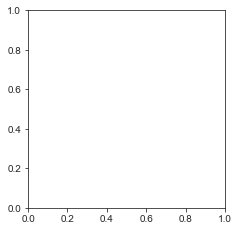

In [4]:
evo_cond_list = ['Evo2D','Evo3D']

ancestor_list = [['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON'],['WT'],['CYR1'],['GPB2'],['TOR1'],['IRA1_MIS'],['IRA1_NON']]

xdata = 'Fit2D_early_fitness'
ydata = 'StaPerHour'


plt.figure(figsize=(12,8))
for a,anc in enumerate(ancestor_list):
    
    plt.subplot(2,3,a+1)
    
    this_anc = merged_fitness[merged_fitness['ancestor']==anc]
    for evo_cond in evo_cond_list:
    
        this_pure_diploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='pure_diploids')]

        sns.kdeplot(x=this_pure_diploid[xdata].values,y=this_pure_diploid[ydata].values,
                                color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4,linestyles='--')

        this_neutral_haploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='neutral_haploids')]

        sns.kdeplot(x=this_neutral_haploid[xdata].values,y=this_neutral_haploid[ydata].values,
                                color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)
        
        these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
        these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values

        interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]


        interesting_muts = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
        this_data = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
        
        
        if anc != 'WT':
            plt.scatter(this_data[xdata].values,this_data[ydata].values,alpha=0.3,
                        color=tools.anc_evo_cond_color_map[anc][evo_cond],marker=tools.evo_cond_marker_map[evo_cond])
        else:
            plt.scatter(this_data[xdata].values,this_data[ydata].values,alpha=0.3,color='k')
#         plt.scatter(this_data['Fit2D_both2%5%_fitness'].values,this_data['StaPerHour'].values)
        
        if len(this_data[xdata].values) > 0:
            reg = LinearRegression(fit_intercept = False).fit(this_data[xdata].values.reshape(-1, 1),this_data['StaPerHour'].values)

            xs = np.linspace(0,3,100)
            plt.plot(xs,reg.coef_*xs+reg.intercept_,color=tools.anc_evo_cond_color_map[anc][evo_cond])
            
            reg2 = LinearRegression().fit(this_data[xdata].values.reshape(-1, 1),this_data[ydata].values)

            xs = np.linspace(0,3,100)
            plt.plot(xs,reg2.coef_*xs+reg2.intercept_,ls='--',color=tools.anc_evo_cond_color_map[anc][evo_cond])
            
            if anc != 'WT':
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]


                reg3 = LinearRegression(fit_intercept=False).fit((this_data[xdata].values-background_mutant[xdata].values).reshape(-1, 1)
                                              ,this_data[ydata].values-background_mutant[ydata].values)
                


                xs = np.linspace(0,3,100)
                plt.plot(xs,reg3.coef_*(xs-background_mutant[xdata].values)+(reg3.intercept_)+background_mutant[ydata].values,
                         ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond])
#                 plt.plot(xs,reg3.coef_*(xs)+(reg3.intercept_)+background_mutant[ydata].values,
#                          ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond])

        if anc != 'WT':
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

            plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                                    marker='+',color=tools.anc_color_map[anc],s=100)
            
    plt.xlim(tools.lims[xdata][0],tools.lims[xdata][1])
    plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])
    
    plt.xlabel(xdata)
    plt.ylabel(ydata)
plt.tight_layout()

In [ ]:
evo_cond_list = ['Evo2D','Evo3D']

ancestor_list = ['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']

merged_fitness['FerPerHour+ResPerHour'] = merged_fitness['FerPerHour'] + merged_fitness['ResPerHour'] 

xdata = 'FerPerHour+ResPerHour'
ydata = 'StaPerHour'


plt.figure(figsize=(12,8))
for a,anc in enumerate(ancestor_list):
    
    plt.subplot(2,3,a+1)
    
    this_anc = merged_fitness[merged_fitness['ancestor']==anc]
    for evo_cond in evo_cond_list:
    
        this_pure_diploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='pure_diploids')]

        sns.kdeplot(x=this_pure_diploid[xdata].values,y=this_pure_diploid[ydata].values,
                                color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4,linestyles='--')

        this_neutral_haploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='neutral_haploids')]

        sns.kdeplot(x=this_neutral_haploid[xdata].values,y=this_neutral_haploid[ydata].values,
                                color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)
        
        these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
        these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values

        interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]


        interesting_muts = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
        this_data = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
        
        if evo_cond == 'Evo2D':
            print(anc,scipy.stats.pearsonr(this_data[xdata].values,this_data[ydata].values))
            plt.title(f'{anc} r={np.corrcoef(this_data[xdata].values,this_data[ydata].values)[0,1]:.2f}')
        
        
        plt.scatter(this_data[xdata].values,this_data[ydata].values,alpha=0.5)
#         plt.scatter(this_data['Fit2D_both2%5%_fitness'].values,this_data['StaPerHour'].values)
        
        if len(this_data[xdata].values) > 0:
            reg = LinearRegression(fit_intercept = False).fit(this_data[xdata].values.reshape(-1, 1),this_data['StaPerHour'].values)

            xs = np.linspace(0,3,100)
            plt.plot(xs,reg.coef_*xs+reg.intercept_,color=tools.anc_evo_cond_color_map[anc][evo_cond])
            
            reg2 = LinearRegression().fit(this_data[xdata].values.reshape(-1, 1),this_data[ydata].values)

            xs = np.linspace(0,3,100)
            plt.plot(xs,reg2.coef_*xs+reg2.intercept_,ls='--',color=tools.anc_evo_cond_color_map[anc][evo_cond])
            
            if anc != 'WT':
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]


                reg3 = LinearRegression(fit_intercept=False).fit((this_data[xdata].values-background_mutant[xdata].values).reshape(-1, 1)
                                              ,this_data[ydata].values-background_mutant[ydata].values)

                xs = np.linspace(0,3,100)
                plt.plot(xs,reg3.coef_*(xs-background_mutant[xdata].values)+(reg3.intercept_)+background_mutant[ydata].values,
                         ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond])
#                 plt.plot(xs,reg3.coef_*(xs)+(reg3.intercept_)+background_mutant[ydata].values,
#                          ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond])

        if anc != 'WT':
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

            plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                                    marker='+',color=tools.anc_color_map[anc],s=100)
            
    
    plt.xlim(-0.02,0.15)
    plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])
    
    plt.xlabel(xdata)
    plt.ylabel(ydata)
    
    plt.axhline(0,color='k',alpha=0.4)
    plt.axvline(0,color='k',alpha=0.4)
    
plt.tight_layout()

In [6]:
evo_cond_list = ['Evo2D','Evo3D']

ancestor_list = [['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON'],['WT'],['CYR1'],['GPB2'],['TOR1'],['IRA1_MIS'],['IRA1_NON']]

merged_fitness['FerPerHour+ResPerHour'] = merged_fitness['FerPerHour'] + merged_fitness['ResPerHour'] 

xdata = 'FerPerHour+ResPerHour'
ydata = 'Fit2D_early_fitness'


plt.figure(figsize=(12,8))
for a,ancs in enumerate(ancestor_list):
    
    i
    
    plt.subplot(2,3,a+1)
    
    this_anc = merged_fitness[merged_fitness['ancestor']==anc]
    for evo_cond in evo_cond_list:
    
        this_pure_diploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='pure_diploids')]

        sns.kdeplot(x=this_pure_diploid[xdata].values,y=this_pure_diploid[ydata].values,
                                color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4,linestyles='--')

        this_neutral_haploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='neutral_haploids')]

        sns.kdeplot(x=this_neutral_haploid[xdata].values,y=this_neutral_haploid[ydata].values,
                                color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)
        
        these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
        these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values

        interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]


        interesting_muts = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
        this_data = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
        
        if evo_cond == 'Evo2D':
            print(anc,scipy.stats.pearsonr(this_data[xdata].values,this_data[ydata].values))
            plt.title(f'{anc} r={np.corrcoef(this_data[xdata].values,this_data[ydata].values)[0,1]:.2f}')
        
        
        plt.scatter(this_data[xdata].values,this_data[ydata].values,alpha=0.5)
#         plt.scatter(this_data['Fit2D_both2%5%_fitness'].values,this_data['StaPerHour'].values)
        
#         if len(this_data[xdata].values) > 0:
#             reg = LinearRegression(fit_intercept = False).fit(this_data[xdata].values.reshape(-1, 1),this_data['StaPerHour'].values)

#             xs = np.linspace(0,3,100)
#             plt.plot(xs,reg.coef_*xs+reg.intercept_,color=tools.anc_evo_cond_color_map[anc][evo_cond])
            
#             reg2 = LinearRegression().fit(this_data[xdata].values.reshape(-1, 1),this_data[ydata].values)

#             xs = np.linspace(0,3,100)
#             plt.plot(xs,reg2.coef_*xs+reg2.intercept_,ls='--',color=tools.anc_evo_cond_color_map[anc][evo_cond])
            
#             if anc != 'WT':
#                 background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]


#                 reg3 = LinearRegression(fit_intercept=False).fit((this_data[xdata].values-background_mutant[xdata].values).reshape(-1, 1)
#                                               ,this_data[ydata].values-background_mutant[ydata].values)

#                 xs = np.linspace(0,3,100)
#                 plt.plot(xs,reg3.coef_*(xs-background_mutant[xdata].values)+(reg3.intercept_)+background_mutant[ydata].values,
#                          ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond])
# #                 plt.plot(xs,reg3.coef_*(xs)+(reg3.intercept_)+background_mutant[ydata].values,
# #                          ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond])

        if anc != 'WT':
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

            plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                                    marker='+',color=tools.anc_color_map[anc],s=100)
            
    
    plt.xlim(-0.02,0.15)
    plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])
    
    plt.xlabel(xdata)
    plt.ylabel(ydata)
    
    plt.axhline(0,color='k',alpha=0.4)
    plt.axvline(0,color='k',alpha=0.4)
    
plt.tight_layout()

NameError: name 'i' is not defined

<Figure size 864x576 with 0 Axes>

No handles with labels found to put in legend.


WT
['Evo2D']
WT ['Evo2D'] -0.26377845486984647 0.007290570392411269 2.320421359937063e-11
CYR1
['Evo2D']
CYR1 ['Evo2D'] 0.06509809560075247 -0.01413124051709844 0.3510882420817347
GPB2
['Evo2D']
GPB2 ['Evo2D'] -0.0976678974232018 -0.003360240158763823 0.1479430453481067
TOR1
['Evo2D']
TOR1 ['Evo2D'] -0.049217796266965 0.0006239044498433577 0.14007431017055333
IRA1_MIS
['Evo2D']
IRA1_MIS ['Evo2D'] -0.1906805623059488 0.011163124129257584 0.0001270347874369019
IRA1_NON
['Evo2D']
IRA1_NON ['Evo2D'] -0.12303202954957529 -0.017270174549129998 0.5922691387104249


No handles with labels found to put in legend.
No handles with labels found to put in legend.


CYR1
['Evo3D']
CYR1 ['Evo3D'] -0.011786047119216258 -0.001980340752125805 0.904800234907039
GPB2
['Evo3D']
GPB2 ['Evo3D'] -0.13052908600703525 0.008723888815559602 0.41373818639923177
TOR1
['Evo3D']
TOR1 ['Evo3D'] 2.0705966798523314 -0.21452894312647386 0.0
IRA1_MIS
['Evo3D']
IRA1_MIS ['Evo3D'] -0.20945847262596165 0.020878016127811417 0.0031032224836190407
IRA1_NON
['Evo3D']
IRA1_NON ['Evo3D'] -0.25731929645715956 0.023455361697900235 0.0030405440905228853


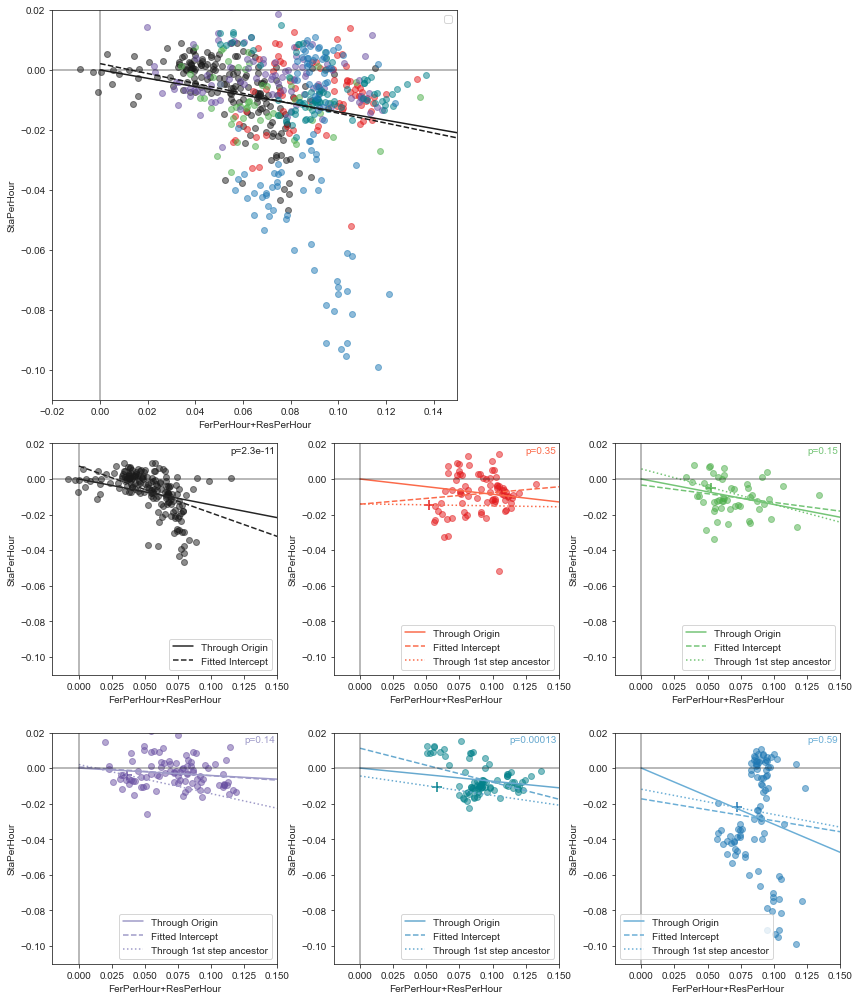

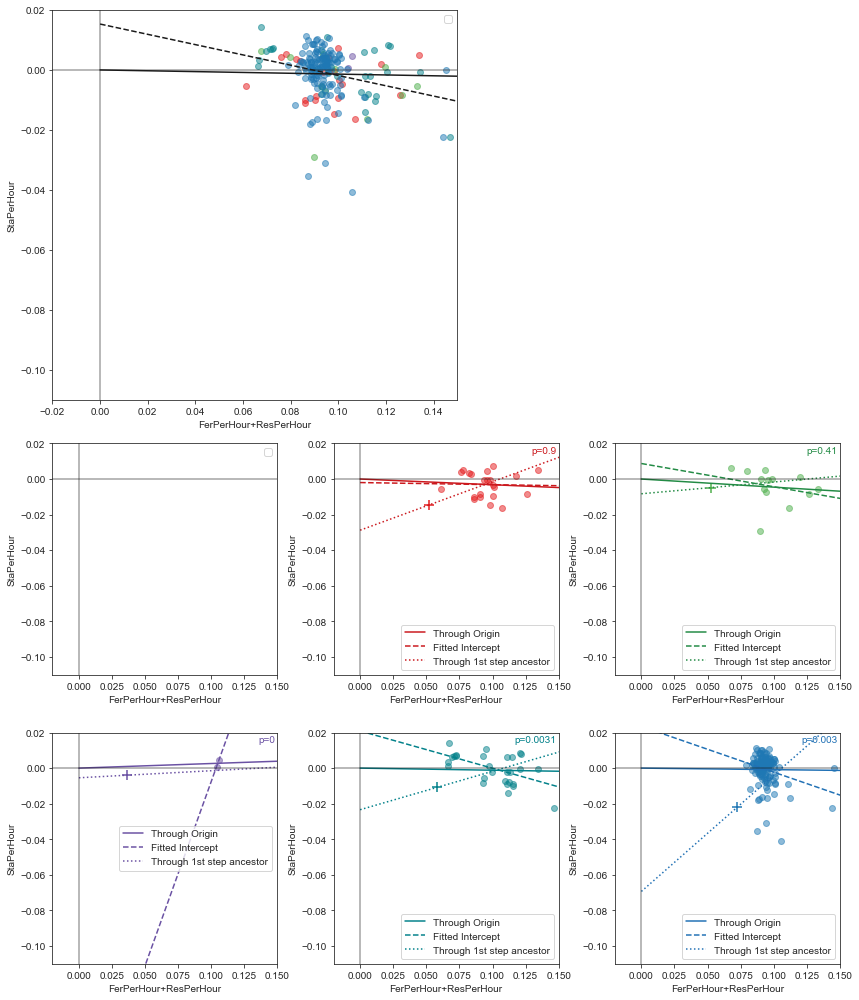

In [25]:

evo_cond_list = [['Evo2D'],['Evo3D'],['Evo2D','Evo3D']]
evo_cond_list = [['Evo2D'],['Evo3D']]
ancestor_list = [['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON'],['WT'],['CYR1'],['GPB2'],['TOR1'],['IRA1_MIS'],['IRA1_NON']]

merged_fitness['FerPerHour+ResPerHour'] = merged_fitness['FerPerHour'] + merged_fitness['ResPerHour'] 
xdata = 'FerPerHour+ResPerHour'
ydata = 'StaPerHour'

# merged_fitness['ResPerHour+StaPerHour'] = merged_fitness['ResPerHour'] + merged_fitness['StaPerHour'] 
# xdata = 'ResPerHour+StaPerHour'
# ydata = 'FerPerHour'

# merged_fitness['FerPerHour+StaPerHour'] = merged_fitness['FerPerHour'] + merged_fitness['StaPerHour'] 
# xdata = 'FerPerHour+StaPerHour'
# ydata = 'ResPerHour'
                 
for evo_cond in evo_cond_list:
    fig = plt.figure(figsize=(12,14))
    outer_gs = gridspec.GridSpec(2, 1,height_ratios=[6,8])

    inner_gs1 = gridspec.GridSpecFromSubplotSpec(1,3,subplot_spec = outer_gs[0],width_ratios=[6,2,2],wspace=0.25,hspace=0.25)
    inner_gs2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec = outer_gs[1],wspace=0.25,hspace=0.25)

    for a,ancs in enumerate(ancestor_list):
        
        if len(ancs) > 1:
            fig.add_subplot(inner_gs1[0]) 
        else:
            fig.add_subplot(inner_gs2[a-1])


        this_anc = merged_fitness


#         this_pure_diploid = this_anc[(this_anc['ancestor'].isin(ancs)) & (this_anc['class_new']=='pure_diploids')]

#         sns.kdeplot(x=this_pure_diploid[xdata].values,y=this_pure_diploid[ydata].values,
#                                 color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4,linestyles='--')

#         this_neutral_haploid = this_anc[(this_anc['ancestor'].isin(ancs)) & (this_anc['class_new']=='neutral_haploids')]

#         sns.kdeplot(x=this_neutral_haploid[xdata].values,y=this_neutral_haploid[ydata].values,
#                                 color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)

        these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
        these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values

        interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]


        interesting_muts = interesting_muts[interesting_muts['evolution_condition'].isin(evo_cond)]
        this_data = interesting_muts[interesting_muts['evolution_condition'].isin(evo_cond)]

        for anc in ancs:
            anc_here = this_data[this_data['ancestor']==anc]
            plt.scatter(anc_here[xdata].values,
                        anc_here[ydata].values,
                        alpha=0.5,color=tools.anc_color_map[anc])
            
            if len(anc_here[xdata].values) > 0 and len(ancs) == 1:
                print(anc)
                print(evo_cond)
                reg = LinearRegression(fit_intercept = False).fit(anc_here[xdata].values.reshape(-1, 1),anc_here[ydata].values)

                xs = np.linspace(0,3,100)
                plt.plot(xs,reg.coef_*xs+reg.intercept_,color=tools.anc_evo_cond_color_map[anc][evo_cond[0]],label='Through Origin')
            
                reg2 = LinearRegression().fit(anc_here[xdata].values.reshape(-1, 1),anc_here[ydata].values)
                
                slope, intercept, r_value, p_value, std_err = stats.linregress(x=anc_here[xdata].values.reshape(-1, 1)[:,0],
                                                                               y=anc_here[ydata].values)
            
                print(anc,evo_cond,slope,intercept,p_value)
                plt.text(x=0.99,y=0.99,s=f'p={p_value:.2g}',transform=plt.gca().transAxes,
                         color=tools.anc_evo_cond_color_map[anc][evo_cond[0]],ha='right',va='top')

                xs = np.linspace(0,3,100)
                plt.plot(xs,reg2.coef_*xs+reg2.intercept_,ls='--',color=tools.anc_evo_cond_color_map[anc][evo_cond[0]],label='Fitted Intercept')
                
                if anc != 'WT':
                    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]


                    reg3 = LinearRegression(fit_intercept=False).fit((this_data[xdata].values-background_mutant[xdata].values).reshape(-1, 1)
                                                  ,this_data[ydata].values-background_mutant[ydata].values)

                    xs = np.linspace(0,3,100)
                    plt.plot(xs,reg3.coef_*(xs-background_mutant[xdata].values)+(reg3.intercept_)+background_mutant[ydata].values,
                             ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond[0]],label='Through 1st step ancestor')
    #                 plt.plot(xs,reg3.coef_*(xs)+(reg3.intercept_)+background_mutant[ydata].values,
    #                          ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond])
             
        if len(ancs) > 1:

            reg = LinearRegression(fit_intercept = False).fit(this_data[xdata].values.reshape(-1, 1),this_data['StaPerHour'].values)

            xs = np.linspace(0,0.15,100)
            plt.plot(xs,reg.coef_*xs+reg.intercept_,color='k')

            reg2 = LinearRegression().fit(this_data[xdata].values.reshape(-1, 1),this_data[ydata].values)

            xs = np.linspace(0,0.15,100)
            plt.plot(xs,reg2.coef_*xs+reg2.intercept_,ls='--',color='k')
            

            
            
        elif ancs != ['WT']:
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancs[0]]]

            plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                                    marker='+',color=tools.anc_color_map[ancs[0]],s=100)
            
    

        plt.xlim(-0.02,0.15)
        plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])

        plt.xlabel(xdata)
        plt.ylabel(ydata)
        plt.legend()

        plt.axhline(0,color='k',alpha=0.4)
        plt.axvline(0,color='k',alpha=0.4)

    plt.tight_layout()
                 
    plt.savefig(f'{home_dir}/figures/analysis/stationary_effect/{xdata}v{ydata}_all{evo_cond}.pdf',bbox_inches='tight')
    plt.savefig(f'{home_dir}/figures/analysis/stationary_effect/{xdata}v{ydata}_all{evo_cond}.png',bbox_inches='tight',dpi=300)

No handles with labels found to put in legend.


WT ['Evo2D'] -0.013108667009775723 -0.0065069156207110505 0.8778970437953183
CYR1 ['Evo2D'] 0.15273804157849744 -0.01212899447550404 0.043446759565620025
GPB2 ['Evo2D'] -0.1661979507839008 -0.008052496922342098 0.2743031476387782
TOR1 ['Evo2D'] -0.08046115605749148 -0.0016404047364665683 0.23719999576974415
IRA1_MIS ['Evo2D'] -0.1398628042665594 -0.0021151492690093246 0.12358382637607385
IRA1_NON ['Evo2D'] 1.04220836971806 -0.047635807951684705 0.005823689568556021


No handles with labels found to put in legend.
No handles with labels found to put in legend.


CYR1 ['Evo3D'] 0.1725051650367408 -0.010377249622859977 0.07912073964730285
GPB2 ['Evo3D'] 0.39284325263550296 -0.02028110566734835 0.022708691147230807
TOR1 ['Evo3D'] 0.4968258745228427 -0.012289194046834364 0.0
IRA1_MIS ['Evo3D'] 0.32344080957070426 -0.010720998571799424 0.00352282449109073
IRA1_NON ['Evo3D'] -0.2017563128421672 0.003280894583734798 0.04084498727733118


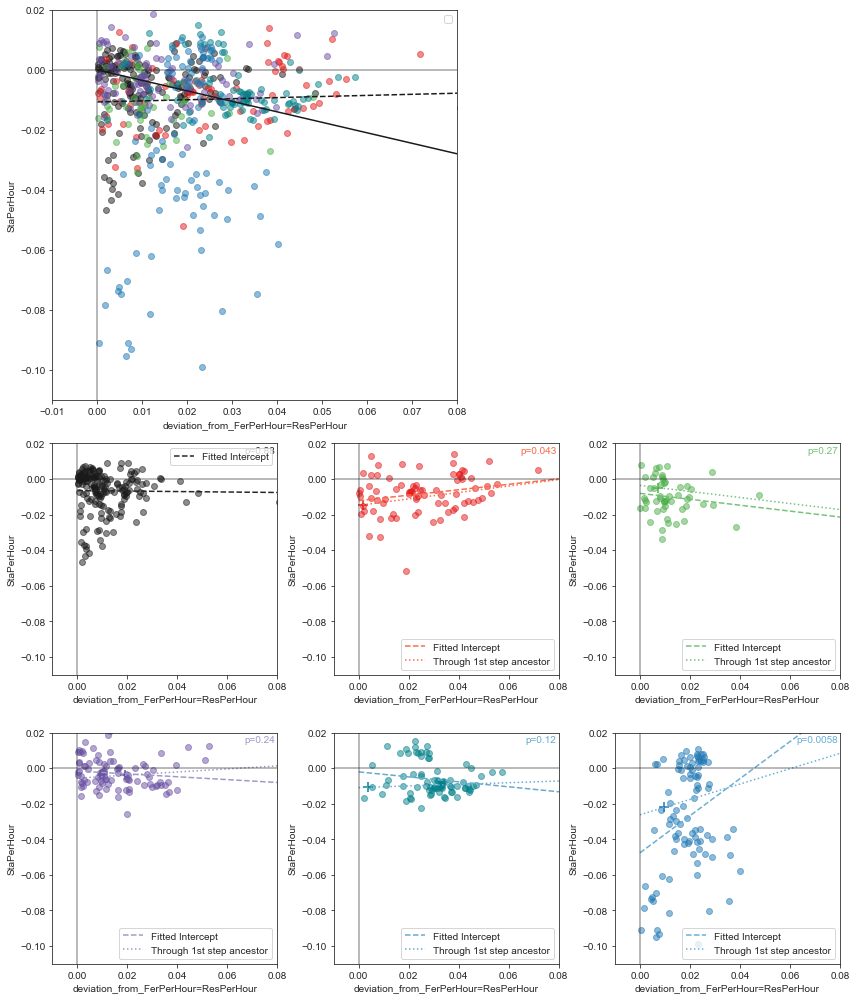

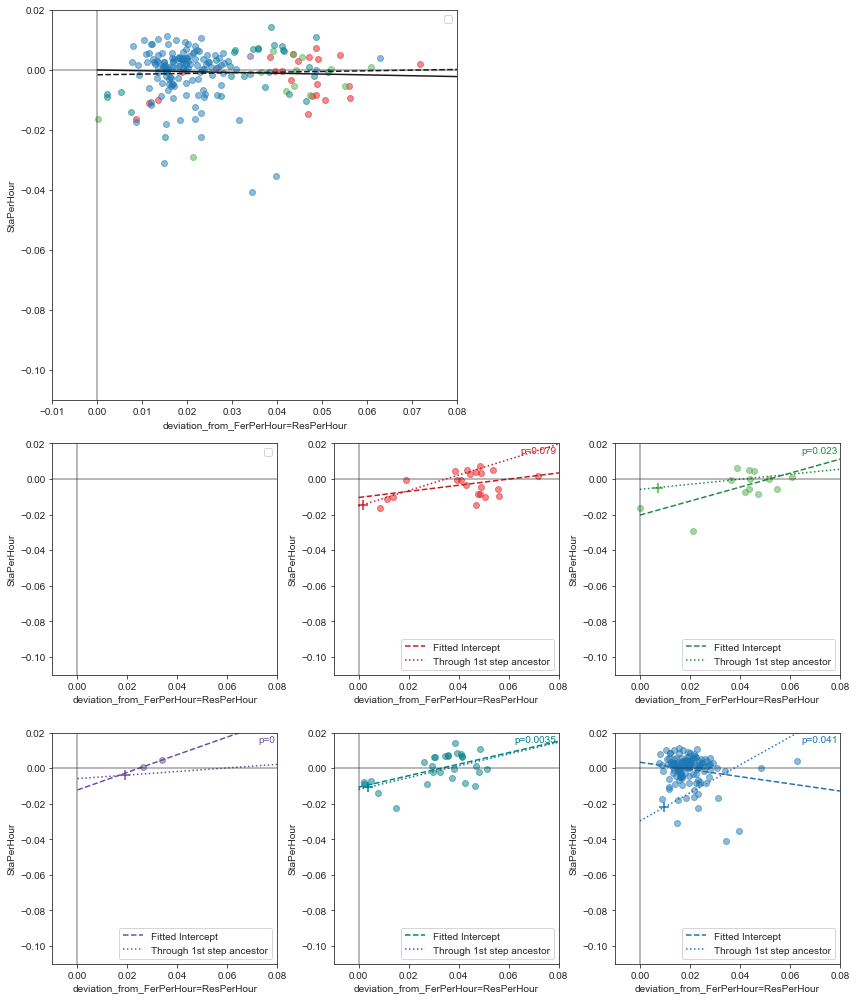

In [24]:

evo_cond_list = [['Evo2D'],['Evo3D'],['Evo2D','Evo3D']]
evo_cond_list = [['Evo2D'],['Evo3D']]
ancestor_list = [['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON'],['WT'],['CYR1'],['GPB2'],['TOR1'],['IRA1_MIS'],['IRA1_NON']]

merged_fitness['FerPerHour+ResPerHour'] = merged_fitness['FerPerHour'] + merged_fitness['ResPerHour'] 
xdata = 'FerPerHour+ResPerHour'
ydata = 'StaPerHour'

merged_fitness['deviation_from_FerPerHour=ResPerHour'] = np.abs(merged_fitness['ResPerHour']- merged_fitness['FerPerHour'])/np.sqrt(2)
xdata = 'deviation_from_FerPerHour=ResPerHour'
ydata = 'StaPerHour'

these_xlims = [-0.01,0.08]

# merged_fitness['ResPerHour+StaPerHour'] = merged_fitness['ResPerHour'] + merged_fitness['StaPerHour'] 
# xdata = 'ResPerHour+StaPerHour'
# ydata = 'FerPerHour'

# merged_fitness['FerPerHour+StaPerHour'] = merged_fitness['FerPerHour'] + merged_fitness['StaPerHour'] 
# xdata = 'FerPerHour+StaPerHour'
# ydata = 'ResPerHour'
                 
for evo_cond in evo_cond_list:
    fig = plt.figure(figsize=(12,14))
    outer_gs = gridspec.GridSpec(2, 1,height_ratios=[6,8])

    inner_gs1 = gridspec.GridSpecFromSubplotSpec(1,3,subplot_spec = outer_gs[0],width_ratios=[6,2,2],wspace=0.25,hspace=0.25)
    inner_gs2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec = outer_gs[1],wspace=0.25,hspace=0.25)

    for a,ancs in enumerate(ancestor_list):
        
        if len(ancs) > 1:
            fig.add_subplot(inner_gs1[0]) 
        else:
            fig.add_subplot(inner_gs2[a-1])


        this_anc = merged_fitness


#         this_pure_diploid = this_anc[(this_anc['ancestor'].isin(ancs)) & (this_anc['class_new']=='pure_diploids')]

#         sns.kdeplot(x=this_pure_diploid[xdata].values,y=this_pure_diploid[ydata].values,
#                                 color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4,linestyles='--')

#         this_neutral_haploid = this_anc[(this_anc['ancestor'].isin(ancs)) & (this_anc['class_new']=='neutral_haploids')]

#         sns.kdeplot(x=this_neutral_haploid[xdata].values,y=this_neutral_haploid[ydata].values,
#                                 color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)

        these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
        these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values

        interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]


        interesting_muts = interesting_muts[interesting_muts['evolution_condition'].isin(evo_cond)]
        this_data = interesting_muts[interesting_muts['evolution_condition'].isin(evo_cond)]

        for anc in ancs:
            anc_here = this_data[this_data['ancestor']==anc]
            plt.scatter(anc_here[xdata].values,
                        anc_here[ydata].values,
                        alpha=0.5,color=tools.anc_color_map[anc])
            
            if len(anc_here[xdata].values) > 0 and len(ancs) == 1:
#                 print(anc)
#                 print(evo_cond)
#                 reg = LinearRegression(fit_intercept = False).fit(anc_here[xdata].values.reshape(-1, 1),anc_here[ydata].values)

#                 xs = np.linspace(0,3,100)
#                 plt.plot(xs,reg.coef_*xs+reg.intercept_,color=tools.anc_evo_cond_color_map[anc][evo_cond[0]],label='Through Origin')
            
                reg2 = LinearRegression().fit(anc_here[xdata].values.reshape(-1, 1),anc_here[ydata].values)

                xs = np.linspace(0,3,100)
                plt.plot(xs,reg2.coef_*xs+reg2.intercept_,ls='--',color=tools.anc_evo_cond_color_map[anc][evo_cond[0]],label='Fitted Intercept')
                
                slope, intercept, r_value, p_value, std_err = stats.linregress(x=anc_here[xdata].values.reshape(-1, 1)[:,0],
                                                                               y=anc_here[ydata].values)
            
                print(anc,evo_cond,slope,intercept,p_value)
                plt.text(x=0.99,y=0.99,s=f'p={p_value:.2g}',transform=plt.gca().transAxes,
                         color=tools.anc_evo_cond_color_map[anc][evo_cond[0]],ha='right',va='top')
                
                if anc != 'WT':
                    background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]


                    reg3 = LinearRegression(fit_intercept=False).fit((this_data[xdata].values-background_mutant[xdata].values).reshape(-1, 1)
                                                  ,this_data[ydata].values-background_mutant[ydata].values)

                    xs = np.linspace(0,3,100)
                    plt.plot(xs,reg3.coef_*(xs-background_mutant[xdata].values)+(reg3.intercept_)+background_mutant[ydata].values,
                             ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond[0]],label='Through 1st step ancestor')
    #                 plt.plot(xs,reg3.coef_*(xs)+(reg3.intercept_)+background_mutant[ydata].values,
    #                          ls=':',color=tools.anc_evo_cond_color_map[anc][evo_cond])
             
        if len(ancs) > 1:

            reg = LinearRegression(fit_intercept = False).fit(this_data[xdata].values.reshape(-1, 1),this_data['StaPerHour'].values)

            xs = np.linspace(0,0.15,100)
            plt.plot(xs,reg.coef_*xs+reg.intercept_,color='k')

            reg2 = LinearRegression().fit(this_data[xdata].values.reshape(-1, 1),this_data[ydata].values)

            xs = np.linspace(0,0.15,100)
            plt.plot(xs,reg2.coef_*xs+reg2.intercept_,ls='--',color='k')
            
        elif ancs != ['WT']:
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancs[0]]]

            plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                                    marker='+',color=tools.anc_color_map[ancs[0]],s=100)
            
    

        plt.xlim(these_xlims[0],these_xlims[1])
        plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])

        plt.xlabel(xdata)
        plt.ylabel(ydata)
        plt.legend()

        plt.axhline(0,color='k',alpha=0.4)
        plt.axvline(0,color='k',alpha=0.4)

    plt.tight_layout()
                 
    plt.savefig(f'{home_dir}/figures/analysis/stationary_effect/{xdata}v{ydata}_all{evo_cond}.pdf',bbox_inches='tight')
    plt.savefig(f'{home_dir}/figures/analysis/stationary_effect/{xdata}v{ydata}_all{evo_cond}.png',bbox_inches='tight',dpi=300)

ValueError: Length of values (194) does not match length of index (1)

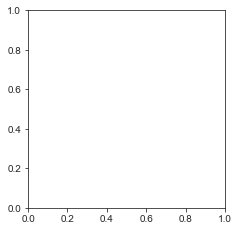

In [49]:
evo_cond_list = ['Evo2D','Evo3D']

ancestor_list = ['WT','CYR1','GPB2','TOR1','IRA1_MIS','IRA1_NON']

xdata = 'Fit2D_early_fitness'
ydata = 'StaPerHour'


plt.figure(figsize=(12,8))
for a,anc in enumerate(ancestor_list):
    
    plt.subplot(2,3,a+1)
    
    this_anc = merged_fitness[merged_fitness['ancestor']==anc]
    for evo_cond in evo_cond_list:
        
        if anc != 'WT':
            background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc]]

#             plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
#                                     marker='+',color=tools.anc_color_map[anc],s=100)
            
        else:
            background_mutant = {}
            background_mutant[xdata] = [0]
            background_mutant[ydata] = [0]
            
            background_mutant = p.DataFrame(background_mutant)
            
#             plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
#                                     marker='+',color=tools.anc_color_map[anc],s=100)
            
    
        this_pure_diploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='pure_diploids')]

        sns.kdeplot(x=this_pure_diploid[xdata].values,
                    y=this_pure_diploid[ydata].values,
                                color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4,linestyles='--')

        this_neutral_haploid = this_anc[(this_anc['ancestor']==anc) & (this_anc['class_new']=='neutral_haploids')]

        sns.kdeplot(x=this_neutral_haploid[xdata].values,
                    y=this_neutral_haploid[ydata].values,
                                color=tools.anc_color_map[anc],alpha=0.4,thresh=0.2,levels=4)
        
        these_pure_diploids = this_anc[this_anc['class_new']=='pure_diploids']['barcode'].values
        these_neutral_haploids = this_anc[this_anc['class_new']=='neutral_haploids']['barcode'].values

        interesting_muts = this_anc[~this_anc['barcode'].isin(list(these_neutral_haploids)+list(these_pure_diploids))]


        interesting_muts = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
        this_data = interesting_muts[interesting_muts['evolution_condition']==evo_cond]
        

        plt.scatter(this_data[xdata].values-background_mutant[xdata].values[0],
                    this_data[ydata].values-background_mutant[ydata].values[0],
                    alpha=0.5)
#         plt.scatter(this_data['Fit2D_both2%5%_fitness'].values,this_data['StaPerHour'].values)
        
        if len(this_data[xdata].values) > 0:
            reg = LinearRegression(fit_intercept = False).fit((this_data[xdata].values-background_mutant[xdata]).reshape(-1, 1),
                                          this_data[ydata].values-background_mutant[ydata])

            xs = np.linspace(0,3,100)
            plt.plot(xs,reg.coef_*xs+reg.intercept_,color=tools.anc_evo_cond_color_map[anc][evo_cond])
            
            reg2 = LinearRegression().fit((this_data[xdata].values-background_mutant[xdata]).reshape(-1, 1),
                                          this_data[ydata].values-background_mutant[ydata])

            xs = np.linspace(0,3,100)
            plt.plot(xs,reg2.coef_*xs+reg2.intercept_,ls='--',color='k')
        

            
    plt.xlim(tools.lims[xdata][0],tools.lims[xdata][1])
    plt.ylim(tools.lims[ydata][0],tools.lims[ydata][1])
    
    plt.xlabel(xdata)
    plt.ylabel(ydata)

In [48]:
p.DataFrame(background_mutant)

ValueError: If using all scalar values, you must pass an index

In [29]:
reg.score(this_data['Fit2D_early_fitness'].values.reshape(-1, 1),this_data['StaPerHour'].values)

0.05974196903802498

In [30]:
reg.coef_

array([-0.00951696])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

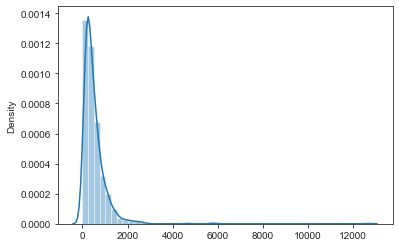

In [46]:
sns.distplot(merged_fitness[merged_fitness['source_publication']=='This_study']['Fit1D-2%-R1-T2'].values)

(0.0, 100.0)

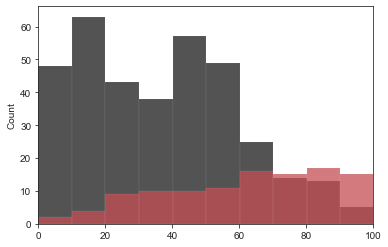

In [78]:
timepoint= 'Fit2D-2%-T0'
timepoint= 'Fit2D-2%-R1-T2'
plt.figure()
counts,bins = np.histogram(merged_fitness[merged_fitness['source_publication']=='This_study'][timepoint].values,
                          bins=np.linspace(0,5000,500))
sns.histplot(merged_fitness[merged_fitness['source_publication']=='Venkataram2015'][timepoint].values,color='k',bins=bins)
sns.histplot(merged_fitness[merged_fitness['source_publication']=='This_study'][timepoint].values,color='r',bins=bins)
plt.xlim(0,100)

In [92]:
timepoints = ['Fit2D-5%-T0','Fit2D-5%-R1-T2','Fit1D-5%-T0','Fit1D-5%-R1-T2']

count_threshold = 50

sum(np.all(merged_fitness[merged_fitness['source_publication']=='This_study'][timepoints].values < count_threshold,axis=1))

2

In [82]:
len(merged_fitness[merged_fitness['source_publication']=='This_study'].values)

1262